# Creating a logo for ORChiD

### Packages to install

In [1]:
! pip install plotille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 526.3 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for plotille: filename=plotille-5.0.0-py3-none-any.whl size=57946 sha256=28892c1b2c46fd7e2ef9dc0beac536687659338d8e368a25ccf9bafe66e4e2e3
  Stored in directory: /home/nnarenraju/.cache/pip/wheels/7c/2f/c0/af4826af8144d7af2040ac24c6cde65580db67c0111351dd2d
Successfully built plotille


### Import required packages

In [2]:
import os
import glob
import plotille
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

## Creating a logo from an image

In [3]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

In [4]:
def change_contrast_multi(img, steps):
    width, height = img.size
    canvas = Image.new('RGB', (width * len(steps), height))
    for n, level in enumerate(steps):
        img_filtered = change_contrast(img, level)
        canvas.paste(img_filtered, (width * n, 0))
    return canvas

./media/orchid_9.jpg


AssertionError: 

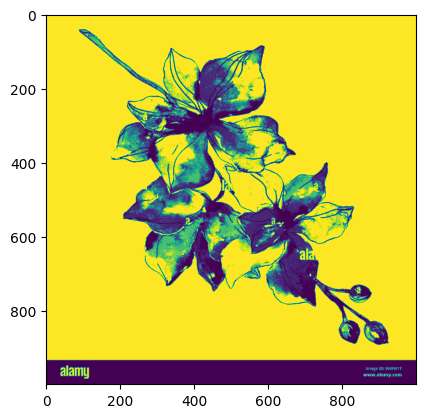

In [20]:
for filename in glob.glob('./media/*.jpg'):
    print(filename)
    img = Image.open(filename)
    img = change_contrast_multi(img, [200])
    img = img.convert('L')
    img = img.resize((1000, 1000))
    plt.imshow(img)
    cvs = plotille.Canvas(50, 50)
    cvs.braille_image(img.getdata())
    print(cvs.plot())
    raise